<a href="https://colab.research.google.com/github/grojasc/MIA/blob/main/Lab1_Aprendizaje_No_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import scipy.cluster.hierarchy as sch
from sklearn.metrics import pairwise_distances

In [4]:
# import data
iris = datasets.load_iris()
X = iris.data[:, :]  
y = iris.target

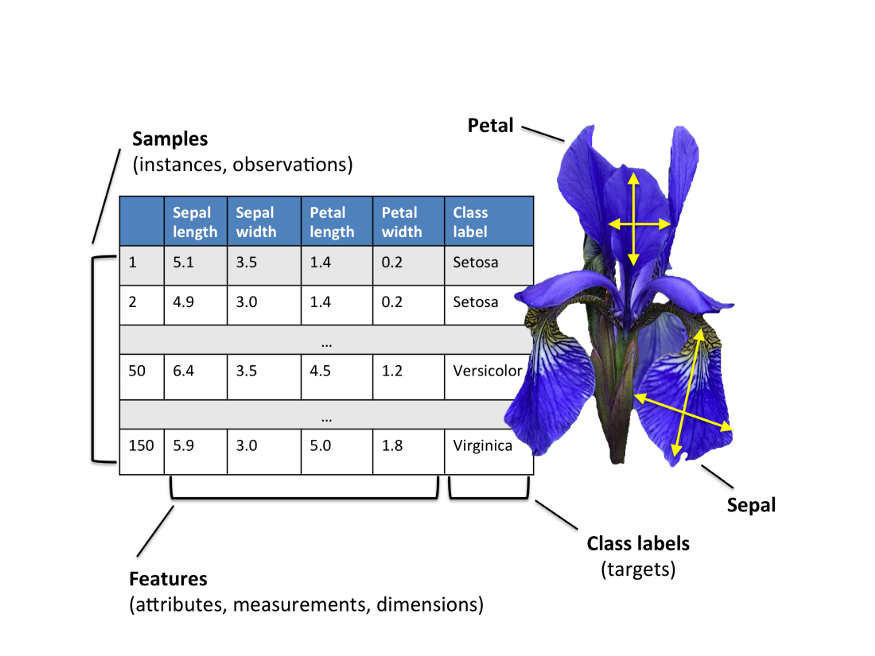

In [6]:
type(X)

numpy.ndarray

#1- Realice una pequeña descripción estadística de las variables. ¿se justifica o no una estandarización de las variables cuantitativas?.

In [7]:
iris_data  = pd.read_csv('/content/drive/MyDrive/MIA 2022/Aprendizaje no Supervisado/Iris.csv')

In [8]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
print(iris_data.describe())
print(iris_data.info())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    

In [22]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

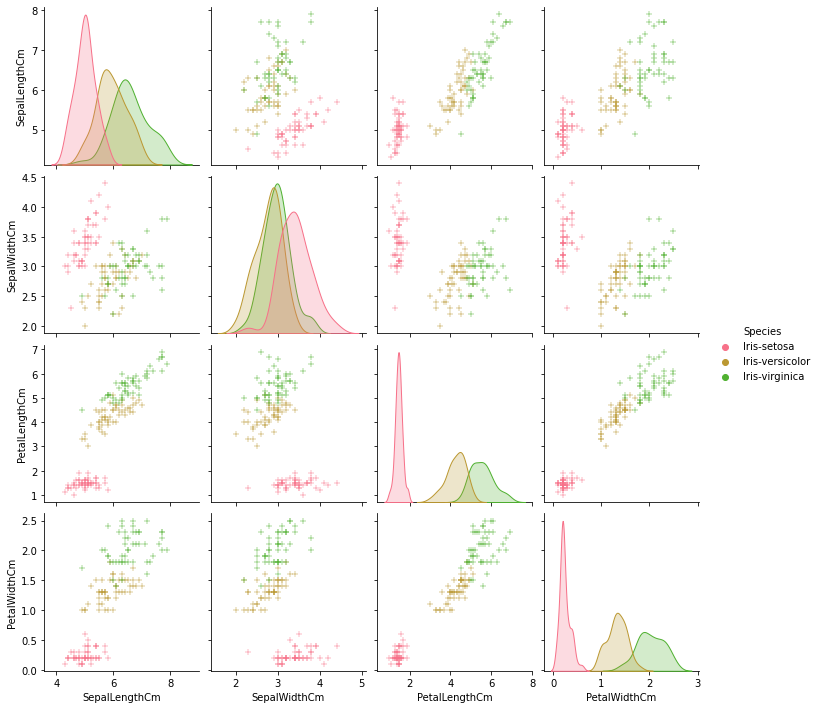

In [24]:
tmp = iris_data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

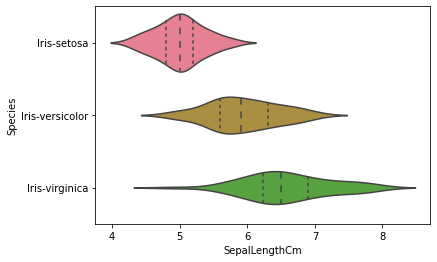

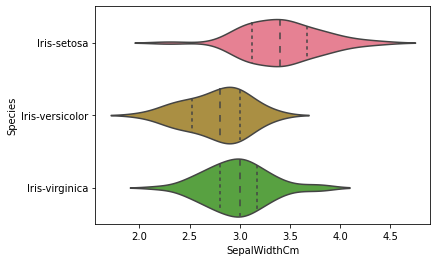

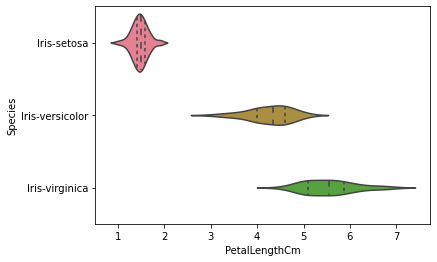

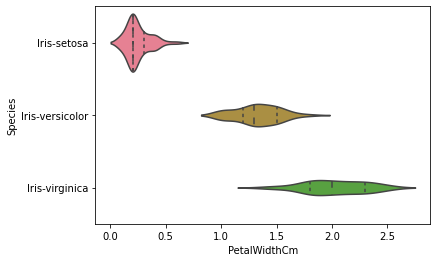

In [26]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=iris_data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=iris_data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=iris_data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=iris_data, inner='quartile')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


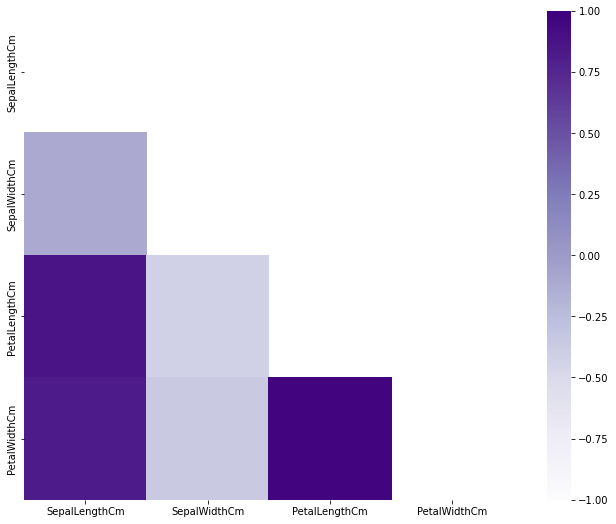

In [12]:
#Matriz de correlacion
matcorr = iris_data.iloc[:,~iris_data.columns.isin(['Id','Species'])].corr()
mask = np.zeros_like(matcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matcorr, mask=mask, cmap="Purples", vmin=-1, vmax=1, center=0, square=True);
plt.show()

In [45]:
iris_data.groupby('Species').agg(['mean', 'median','std'])

Id                  SepalLengthCm                   \
                  mean median       std          mean median       std   
Species                                                                  
Iris-setosa       25.5   25.5  14.57738         5.006    5.0  0.352490   
Iris-versicolor   75.5   75.5  14.57738         5.936    5.9  0.516171   
Iris-virginica   125.5  125.5  14.57738         6.588    6.5  0.635880   

                SepalWidthCm                  PetalLengthCm                   \
                        mean median       std          mean median       std   
Species                                                                        
Iris-setosa            3.418    3.4  0.381024         1.464   1.50  0.173511   
Iris-versicolor        2.770    2.8  0.313798         4.260   4.35  0.469911   
Iris-virginica         2.974    3.0  0.322497         5.552   5.55  0.551895   

                PetalWidthCm                   
                        mean median       std  
Species                                        
Iris-setosa            0.244    0.2  0.107210  
Iris-versicolor        1.326    1.3  0.197753  
Iris-virginica         2.026    2.0  0.274650

#2


In [39]:
from sklearn.cluster import AgglomerativeClustering
iris = iris_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(iris)

AgglomerativeClustering(n_clusters=3)

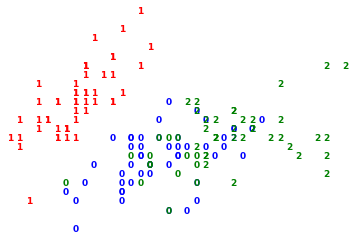

In [37]:
from sklearn import preprocessing
iris_plot = preprocessing.MinMaxScaler().fit_transform(iris)

colours = 'rbg'
for i in range(iris.shape[0]):
    plt.text(iris_plot[i, 0], iris_plot[i, 1], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

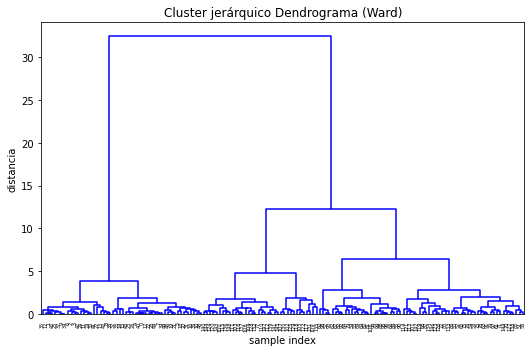

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(iris, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Cluster jerárquico Dendrograma (Ward)')
plt.xlabel('sample index')
plt.ylabel('distancia')
plt.tight_layout()
plt.show()

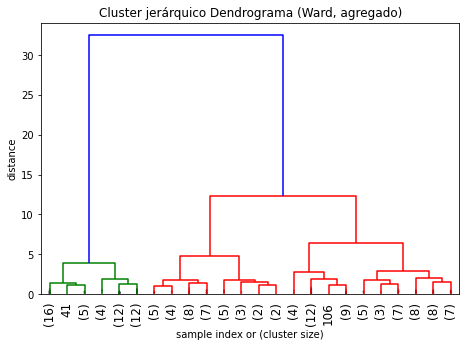

In [42]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Cluster jerárquico Dendrograma (Ward, agregado)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering

groups = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

groups.fit_predict(iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

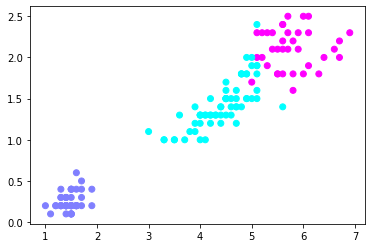

In [43]:
plt.scatter(iris_data['PetalLengthCm'] ,iris_data['PetalWidthCm'], c= groups.labels_, cmap='cool')

# 3. (10 pts extras) Utilice sólo las variables cuantitativas para agrupar los observaciones medianteel método de aglomeramiento divisivo. Visualice el agrupamiento mediante un dendrograma. Crear 3 grupos y comparar los cluster obtenidos, en términos de promedio y desviación estándar.